In [ ]:
import numpy as np
from PIL import Image
import cv2
from IPython.display import display
from matplotlib import pyplot as plt
import glob

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving putin.png to putin.png
Saving putin_mask.png to putin_mask.png
Saving zelensky.png to zelensky.png
Saving zelensky_mask.png to zelensky_mask.png


In [ ]:
def bilateral_filter(image, window, d_sig, r_sig,plot=False):
    m = int((window-1)/2) 
    p = np.zeros(np.add(image.shape, (2 * m, 2 * m, 0)))
    p[m:-m, m:-m] = image
    bifilter = np.zeros(image.shape).astype(np.uint8)
    for i in range(m, p.shape[0] - m):
        for j in range(m, p.shape[1] - m):
            w = 0 # Total weight initlaized to zero every-time the window moves to next pix
            pix = 0
            neighbours = [] 
            for k in range(i - m, i + m + 1):
                for l in range(j - m, j + m + 1):
                    neighbours.append((k, l))
            for neighbour in neighbours:
                w1 = np.exp((((i-neighbour[0])**2 + (j-neighbour[1])**2)/(2*(d_sig)**2))-((p[i,j]-p[neighbour]**2)/(2*r_sig**2)))
                w += w1
                pix += np.multiply(p[neighbour], w1)
                
            bifilter[i - m, j - m] = pix/w
            
    if plot:
        plt.imshow(bifilter) 
    print("window is : ", window)
    print("r_sig is : ", r_sig)
    print("d_sig is : ", d_sig)
    
    return bifiltered_image

In [ ]:
putin='putin.png'
putin_img = cv2.imread(putin)
putin_img = cv2.cvtColor(putin_img, cv2.COLOR_BGR2RGB)

window is :  3
sigma_r is :  15
sigma_d is :  20


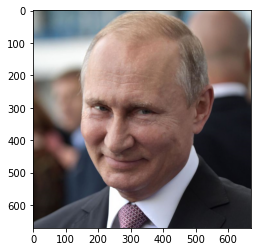

In [ ]:
filtered_image1 = bilateral_filter(putin_img, window=3, r_sig=15, d_sig=20, plot=True)

window is :  5
sigma_r is :  30
sigma_d is :  40


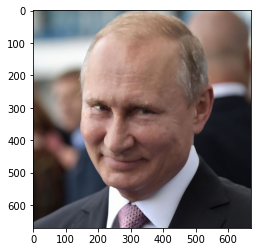

In [ ]:
filtered_iamge2 = bilateral_filter(putin_img, window=5, r_sig=30, d_sig=40, plot=True)

window is :  7
sigma_r is :  40
sigma_d is :  60


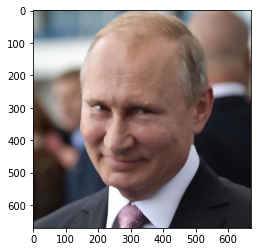

In [ ]:
filtered_image3 = bilateral_filter(putin_img, window=7, r_sig=40, d_sig=60, plot=True)

window is :  9
sigma_r is :  50
sigma_d is :  70


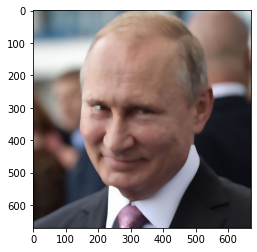

In [ ]:
filtered_image4 = bilateral_filter(putin_img, window=9, r_sig=50, d_sig=70, plot=True)

In [ ]:
zelinsky='zelensky.png'
zelinsky_imgnsky_img = cv2.imread(zelinsky)
zelinsky_img = cv2.cvtColor(zelinsky_img, cv2.COLOR_BGR2RGB)

window is :  3
sigma_r is :  20
sigma_d is :  30


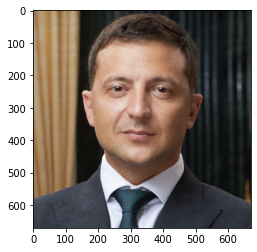

In [ ]:
filtered_image5 = bilateral_filter(zelinsky_img, window=3, r_sig=20, d_sig=30, plot=True)

window is :  5
sigma_r is :  30
sigma_d is :  50


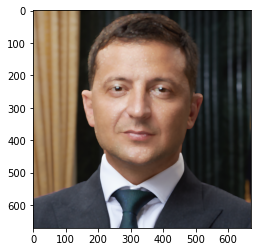

In [ ]:
filtered_image6 = bilateral_filter(zelinsky_img, window=5, r_sig=30, d_sig=50, plot=True)

window is :  7
sigma_r is :  40
sigma_d is :  50


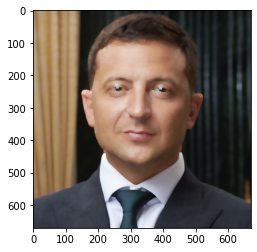

In [ ]:
filtered_image7 = bilateral_filter(zelinsky_img, window=7, r_sig=40, d_sig=50, plot=True)

window is :  9
sigma_r is :  50
sigma_d is :  70


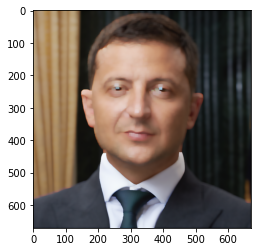

In [ ]:
filtered_image8 = bilateral_filter(zelinsky_img, window=9, r_sig=50, d_sig=70, plot=True)

In [ ]:
def color_image(image,plot=False):
    color_image = np.zeros((image.shape[0], image.shape[0], 3)).astype(np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < 55:
                color_image[i, j] = [0, 48, 80]
            elif image[i, j] < 125:
                color_image[i, j] = [218, 20, 21]
            elif image[i, j] < 185:
                color_image[i, j] = [112, 150, 160]
            elif image[i, j] <= 255:
                color_image[i, j] = [250, 227, 173]
    if plot:            
        plt.imshow(color_image)
    return color_image

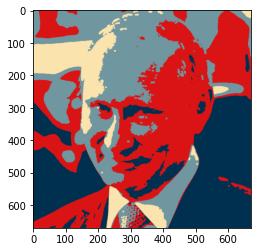

In [ ]:
image1 = cv2.cvtColor(filtered_image1, cv2.COLOR_RGB2GRAY)
res1=color_image(image1,plot=True)

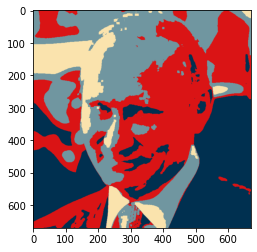

In [ ]:
image2 = cv2.cvtColor(filtered_image2, cv2.COLOR_RGB2GRAY)
res2=color_image(image2,plot=True)

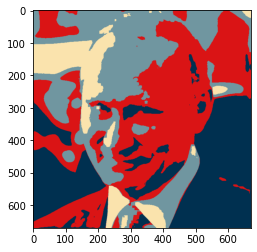

In [ ]:
image3 = cv2.cvtColor(filtered_image3, cv2.COLOR_RGB2GRAY)
res3=color_image(image3,plot=True)

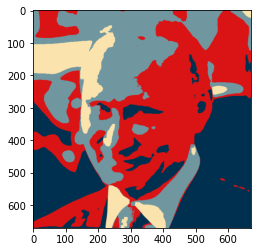

In [ ]:
image4 = cv2.cvtColor(filtered_image4, cv2.COLOR_RGB2GRAY)
res4=color_image(image4,plot=True)

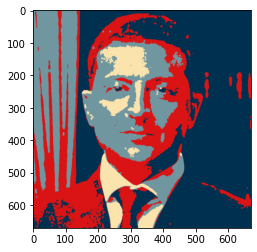

In [ ]:
image5 = cv2.cvtColor(filtered_image5, cv2.COLOR_RGB2GRAY)
res5=color_image(image5,plot=True)

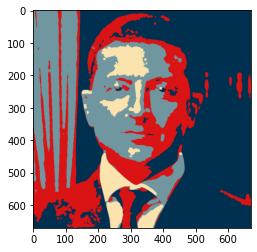

In [ ]:
image6 = cv2.cvtColor(filtered_image6, cv2.COLOR_RGB2GRAY)
res6=color_image(image6,plot=True)

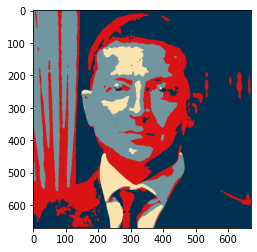

In [ ]:
image7 = cv2.cvtColor(filtered_image7, cv2.COLOR_RGB2GRAY)
res7=color_image(image7,plot=True)

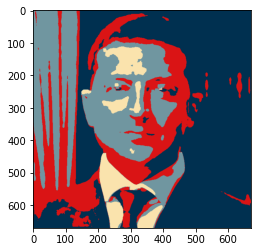

In [ ]:
image8 = cv2.cvtColor(filtered_image8, cv2.COLOR_RGB2GRAY)
res8=color_image(image8,plot=True)

In [ ]:
def masked(image, mask):
    resultult = cv2.bitwise_and(image, mask)
    return result

In [ ]:
def seperate_back_for(image, mask):
    result = np.zeros(image.shape).astype(np.uint8)
    result[:, :image.shape[1] // 2] = [112, 150, 160]
    result[:, image.shape[1] // 2:] = [218, 20, 21]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if all(mask[i, j] != [0, 0, 0]):
                result[i, j] = image[i, j]
                
    plt.imshow(result)
    return result

In [ ]:
putin='putin_mask.png'
img3 = cv2.imread(putin)
img_masked_putin = masked(putin_img,img3)

window is :  3
sigma_r is :  20
sigma_d is :  30


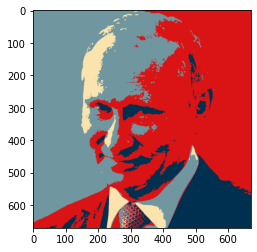

In [ ]:
filtered_image9 = bilateral_filter(img_masked_putin, window=3, r_sig=20, d_sig=30)
image_putin1 = cv2.cvtColor(filtered_image9, cv2.COLOR_RGB2GRAY)
image_putin2 = color_image(image_putin1)
sbf1=seperate_back_for(image_putin2,img3)

window is :  5
sigma_r is :  30
sigma_d is :  50


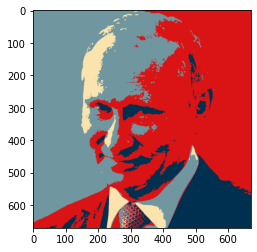

In [ ]:
filtered_image10 = bilateral_filter(img_masked_putin, window=5, r_sig=30, d_sig=50)
image_putin3 = cv2.cvtColor(filtered_image9, cv2.COLOR_RGB2GRAY)
image_putin4 = color_image(image_putin3)
sbf2=seperate_back_for(image_putin4,img3)

window is :  7
sigma_r is :  40
sigma_d is :  60


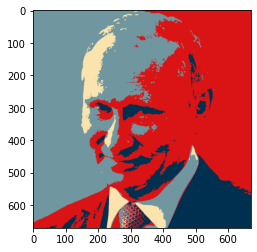

In [ ]:
filtered_image11 = bilateral_filter(img_masked_putin, window=7, r_sig=40, d_sig=60)
image_putin5 = cv2.cvtColor(filtered_image11, cv2.COLOR_RGB2GRAY)
image_putin6 = color_image(image_putin3)
sbf3=seperate_back_for(image_putin6,img3)

window is :  9
sigma_r is :  50
sigma_d is :  70


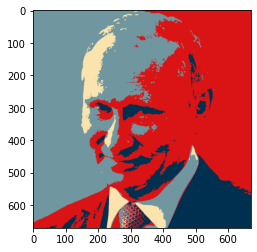

In [ ]:
filtered_image12 = bilateral_filter(img_masked_putin, window=9, r_sig=50, d_sig=70)
image_putin7 = cv2.cvtColor(filtered_image12, cv2.COLOR_RGB2GRAY)
image_putin8 = color_image(image_putin3)
sbf4=seperate_back_for(image_putin8,img3)

In [ ]:
zelinsky='zelensky_mask.png'
img4 = cv2.imread(zelinsky)
img_masked_zelensky = masked(zelinsky_img,img4)

window is :  3
sigma_r is :  20
sigma_d is :  30


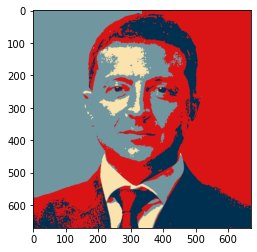

In [ ]:
filtered_image13 = bilateral_filter(img_masked_zelensky, window=3, r_sig=20, d_sig=30)
image_zelenesky1 = cv2.cvtColor(filtered_image13, cv2.COLOR_RGB2GRAY)
image_zelenesky2 = color_image(image_zelenesky1)
sbf5=seperate_back_for(image_zelenesky2,img4)

window is :  5
sigma_r is :  30
sigma_d is :  50


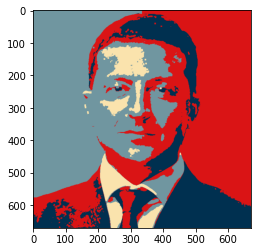

In [ ]:
filtered_image14 = bilateral_filter(img_masked_zelensky, window=5, r_sig=30, d_sig=50)
image_zelenesky3 = cv2.cvtColor(filtered_image14, cv2.COLOR_RGB2GRAY)
image_zelenesky4 = color_image(image_zelenesky3)
sbf6=seperate_back_for(image_zelenesky4,img4)

window is :  7
sigma_r is :  40
sigma_d is :  60


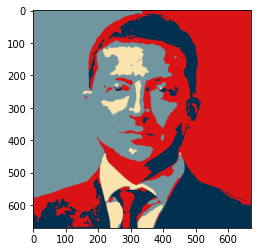

In [ ]:
filtered_image15 = bilateral_filter(img_masked_zelensky, window=7, r_sig=40, d_sig=60)
image_zelenesky5 = cv2.cvtColor(filtered_image15, cv2.COLOR_RGB2GRAY)
image_zelenesky6 = color_image(image_zelenesky5)
sbf7=seperate_back_for(image_zelenesky6,img4)

window is :  9
sigma_r is :  50
sigma_d is :  70


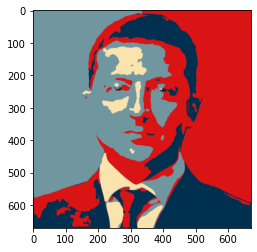

In [ ]:
filtered_image16 = bilateral_filter(img_masked_zelensky, window=9, r_sig=50, d_sig=70)
image_zelenesky7 = cv2.cvtColor(filtered_image16, cv2.COLOR_RGB2GRAY)
image_zelenesky8 = color_image(image_zelenesky7)
sbf8=seperate_back_for(image_zelenesky8,img4)